In [1]:
from scipy.stats import poisson 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

In [2]:
df_07 = pd.read_csv('prem07.csv')

In [3]:
df_08 = pd.read_csv('prem08.csv')

In [4]:
df_09 = pd.read_csv('prem09.csv')

In [5]:
df_10 = pd.read_csv('prem10.csv')

In [6]:
df_11 = pd.read_csv('prem11.csv')

In [7]:
df_12 = pd.read_csv('prem12.csv')

In [8]:
df_13 = pd.read_csv('prem13.csv')

In [9]:
df_14 = pd.read_csv('prem14.csv')

In [10]:
df_15 = pd.read_csv('prem15.csv')

In [11]:
df_16 = pd.read_csv('prem16.csv')

In [12]:
df_17 = pd.read_csv('prem17.csv')

In [13]:
df_18 = pd.read_csv('prem18.csv')

In [14]:
df_19 = pd.read_csv('prem19.csv')

In [15]:
df_20 = pd.read_csv('prem20.csv')

In [16]:
df_21 = pd.read_csv('prem21.csv')

In [17]:
df_22 = pd.read_csv('prem22.csv')

In [18]:
df_23 = pd.read_csv('prem23.csv')

In [19]:
new_df = pd.concat([df_07, df_08, df_09, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23])

In [20]:
column_headers = list(new_df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'BSH', 'BSD', 'BSA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA', 'Time', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD

In [21]:
columns = {'HS': 'Home Shots', 'AS': 'Away Shots', 'HST':'HS on target', 'AST':'AS on target',
          'HF':'Home Fouls', 'AF':'Away fouls', 'HC':'Home conners', 'AC': 'Away coners',
          'HY': 'Home Yellow', 'AY': 'Away Yellow', 'HR':'Home Red', 'AR': 'Away Red'}

In [22]:
features = new_df[['HomeTeam', 'AwayTeam','HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'FTHG', 'FTAG','FTR' ]]
features = features.rename(columns = columns)
features.head()

,HomeTeam,AwayTeam,Home Shots,Away Shots,HS on target,AS on target,Home Fouls,Away fouls,Home conners,Away coners,Home Yellow,Away Yellow,Home Red,Away Red,FTHG,FTAG,FTR
0,Arsenal,Aston Villa,19,5,11,3,10,19,18,1,1,2,0,0,1,1,D
1,Bolton,Tottenham,8,9,6,6,19,22,6,3,0,1,0,0,2,0,H
2,Everton,Watford,6,12,2,8,12,13,0,6,2,2,0,0,2,1,H
3,Newcastle,Wigan,9,14,8,9,17,20,4,11,1,2,0,0,2,1,H
4,Portsmouth,Blackburn,21,9,16,7,20,17,6,2,2,1,0,2,3,0,H


In [23]:
features.describe()

,Home Shots,Away Shots,HS on target,AS on target,Home Fouls,Away fouls,Home conners,Away coners,Home Yellow,Away Yellow,Home Red,Away Red,FTHG,FTAG
count,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000
mean,13.823778,11.095988,5.923827,4.735423,10.842943,11.236479,6.000162,4.789508,1.477018,1.760435,0.059282,0.082833,1.533214,1.177522
std,5.445933,4.739515,3.373618,2.835368,3.547531,3.721975,3.119897,2.751195,1.198467,1.271702,0.244950,0.287196,1.319276,1.161082
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,13.000000,11.000000,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000
75%,17.000000,14.000000,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.000000,2.000000
max,43.000000,31.000000,24.000000,20.000000,33.000000,26.000000,20.000000,19.000000,7.000000,9.000000,2.000000,2.000000,9.000000,9.000000


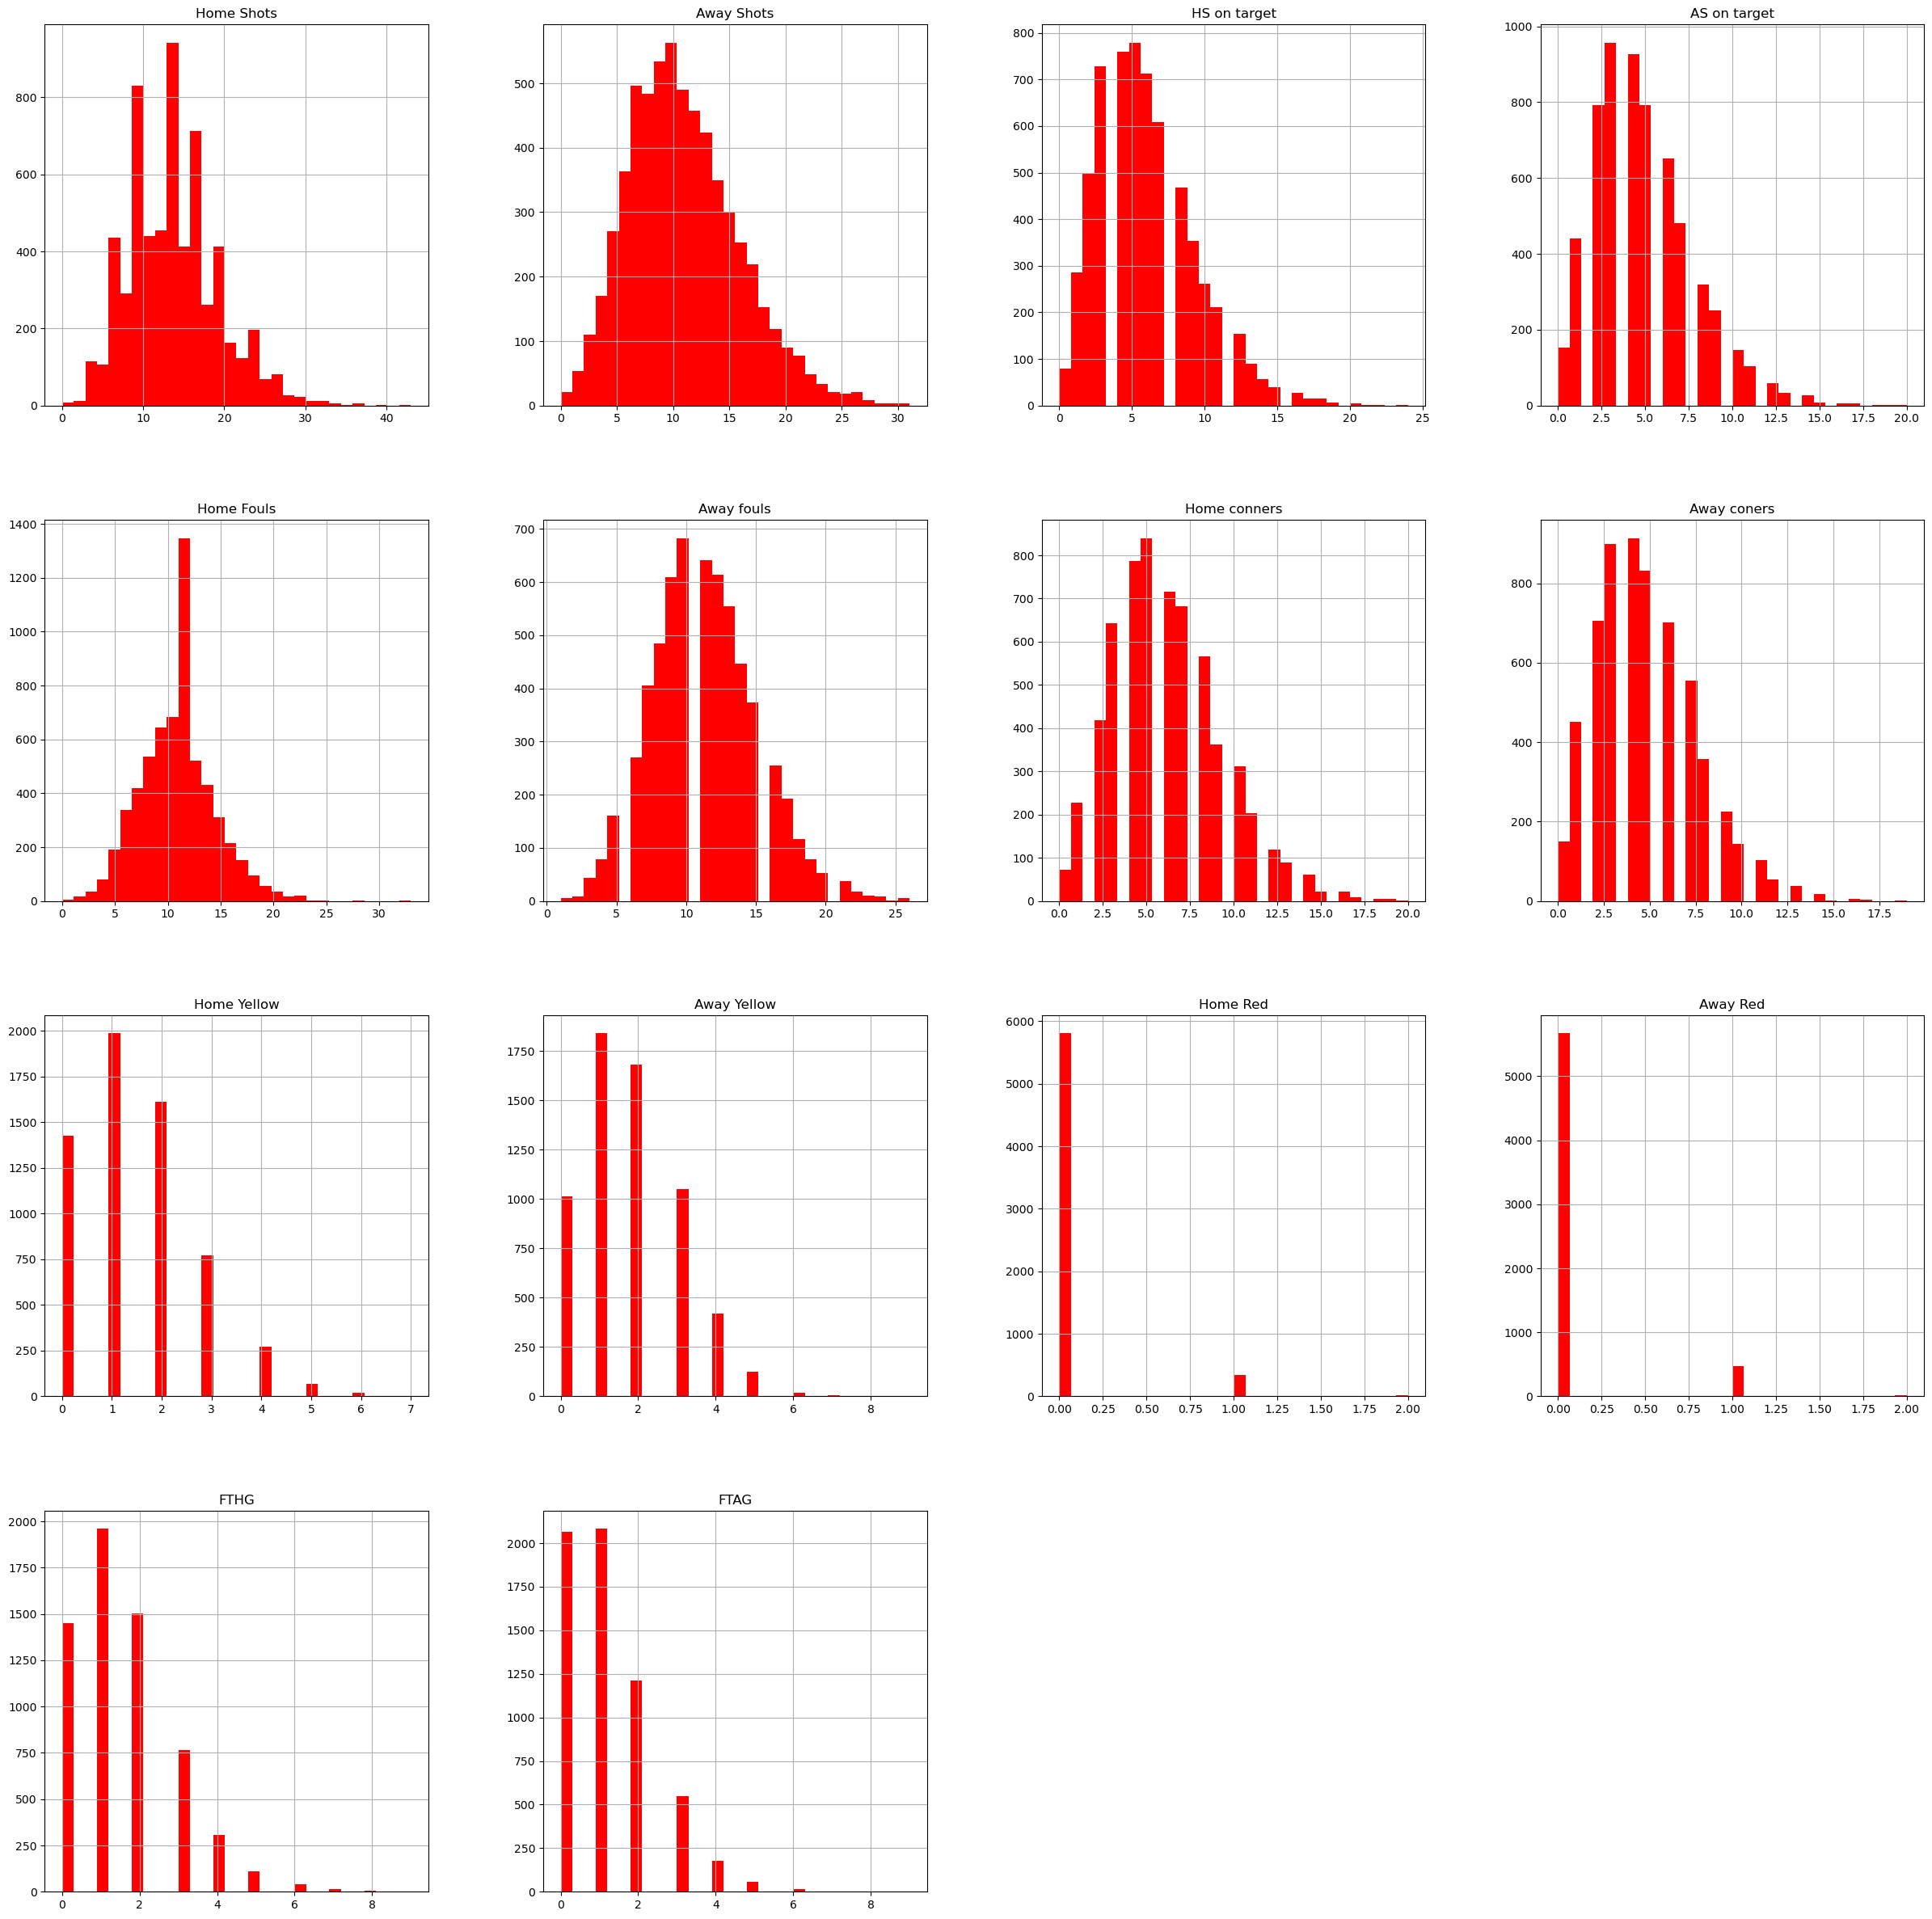

In [24]:
features.hist(bins = 30, figsize =(30, 30), color ='r')
plt.show()

In [25]:
home = new_df[['HomeTeam', 'AwayTeam','HS','HST', 'HF', 'HC', 'HY', 'HR', 'FTHG']]
home = home.assign(home=1)
home = home.rename(
    columns={"HomeTeam": "team",
             "AwayTeam": "opponent", 
             "FTHG": "goals",
            'HS': 'Shots',  'HST':'target','HF':'Fouls', 'HC':'conners',
          'HY': 'Yellow',  'HR': 'Red'}
)

# Separate away goals data 

# Separate home goals data
away = new_df[['HomeTeam', 'AwayTeam','AS','AST', 'AF', 'AC', 'AY', 'AR', 'FTAG']]
away = away.assign(home=0)
away = away.rename(
    columns={"AwayTeam": "team",
             "HomeTeam": "opponent", 
             "FTAG": "goals", 'AS':  'Shots',  'AST':'target','AF':'Fouls', 'AC':'conners',
          'AY': 'Yellow',  'AR': 'Red'})

In [26]:
away.head()

,opponent,team,Shots,target,Fouls,conners,Yellow,Red,goals,home
0,Arsenal,Aston Villa,5,3,19,1,2,0,1,0
1,Bolton,Tottenham,9,6,22,3,1,0,0,0
2,Everton,Watford,12,8,13,6,2,0,1,0
3,Newcastle,Wigan,14,9,20,11,2,0,1,0
4,Portsmouth,Blackburn,9,7,17,2,1,2,0,0


In [27]:
home.head()

,team,opponent,Shots,target,Fouls,conners,Yellow,Red,goals,home
0,Arsenal,Aston Villa,19,11,10,18,1,0,1,1
1,Bolton,Tottenham,8,6,19,6,0,0,2,1
2,Everton,Watford,6,2,12,0,2,0,2,1
3,Newcastle,Wigan,9,8,17,4,1,0,2,1
4,Portsmouth,Blackburn,21,16,20,6,2,0,3,1


In [28]:
df = pd.concat([home, away])
df_1 = df.copy()

In [29]:
df_1['team'].value_counts()

Arsenal             616
Everton             616
Tottenham           616
Man City            616
Chelsea             615
Man United          615
Liverpool           615
West Ham            578
Newcastle           540
Aston Villa         502
Fulham              388
Southampton         388
West Brom           380
Stoke               380
Sunderland          380
Crystal Palace      349
Leicester           312
Burnley             304
Wolves              274
Watford             266
Wigan               266
Swansea             266
Norwich             228
Bolton              228
Blackburn           228
Bournemouth         198
Brighton            197
Hull                190
Portsmouth          152
Middlesbrough       152
Sheffield United    114
QPR                 114
Birmingham          114
Reading             114
Leeds                83
Huddersfield         76
Cardiff              76
Brentford            46
Charlton             38
Blackpool            38
Derby                38
Nott'm Forest   

array([[<AxesSubplot:title={'center':'Shots'}>,
        <AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'Fouls'}>],
       [<AxesSubplot:title={'center':'conners'}>,
        <AxesSubplot:title={'center':'Yellow'}>,
        <AxesSubplot:title={'center':'Red'}>],
       [<AxesSubplot:title={'center':'goals'}>,
        <AxesSubplot:title={'center':'home'}>, <AxesSubplot:>]],
      dtype=object)

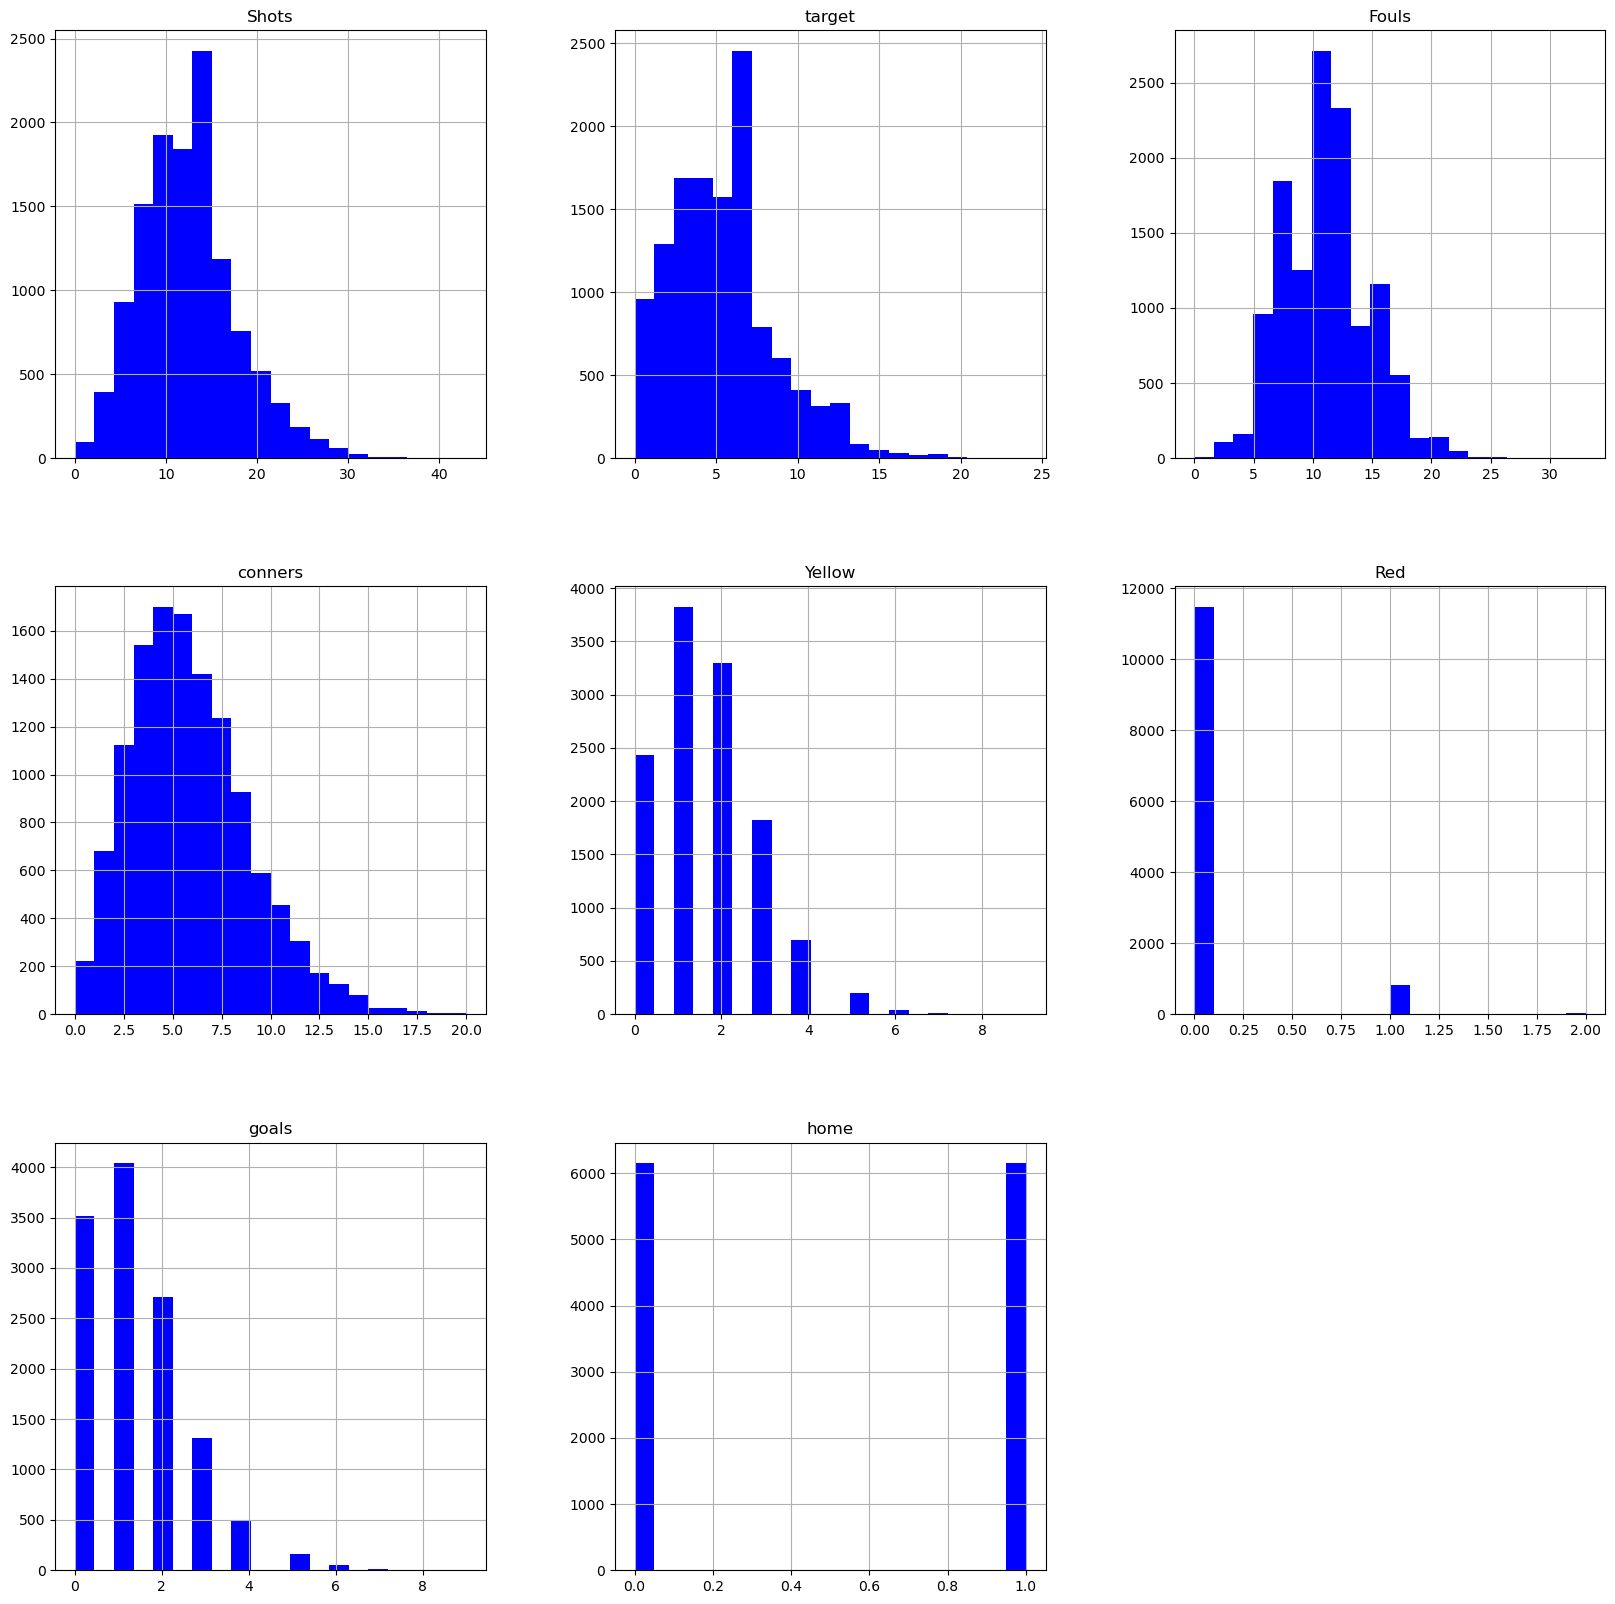

In [30]:
df.hist(bins=20, figsize=(20,20), color='b')

In [31]:
df['conners'].mean()

5.394835146987169

In [32]:
from scipy.stats import poisson

lamConners = df['conners'].mean()
k = np.arange(0,21)
pmf = poisson.pmf(k, mu = lamConners)
pmf = np.round(pmf, 5)
for val, prob in zip(k,pmf):
    print(f"k-value {val} has probability = {prob}")

k-value 0 has probability = 0.00454
k-value 1 has probability = 0.02449
k-value 2 has probability = 0.06607
k-value 3 has probability = 0.11881
k-value 4 has probability = 0.16023
k-value 5 has probability = 0.17289
k-value 6 has probability = 0.15545
k-value 7 has probability = 0.1198
k-value 8 has probability = 0.08079
k-value 9 has probability = 0.04843
k-value 10 has probability = 0.02613
k-value 11 has probability = 0.01281
k-value 12 has probability = 0.00576
k-value 13 has probability = 0.00239
k-value 14 has probability = 0.00092
k-value 15 has probability = 0.00033
k-value 16 has probability = 0.00011
k-value 17 has probability = 4e-05
k-value 18 has probability = 1e-05
k-value 19 has probability = 0.0
k-value 20 has probability = 0.0


In [33]:
df['conners'].count()

12314

In [34]:
expected =[]
for prob in pmf:
    expected.append(prob*12160)
ex = np.round(expected, 3)
print(ex)

[5.520600e+01 2.977980e+02 8.034110e+02 1.444730e+03 1.948397e+03
 2.102342e+03 1.890272e+03 1.456768e+03 9.824060e+02 5.889090e+02
 3.177410e+02 1.557700e+02 7.004200e+01 2.906200e+01 1.118700e+01
 4.013000e+00 1.338000e+00 4.860000e-01 1.220000e-01 0.000000e+00
 0.000000e+00]


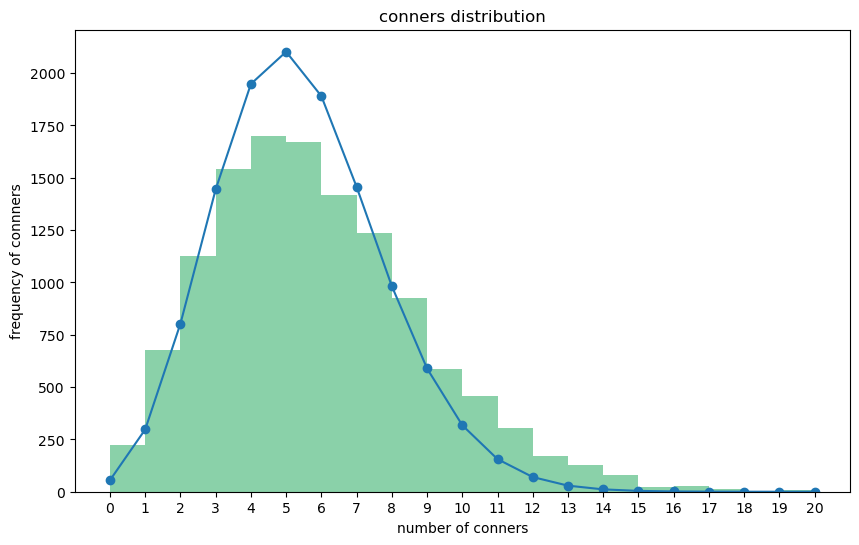

In [35]:
count, bin_edges = np.histogram(df['conners'], 20)

df['conners'].plot(kind='hist',
                         figsize=(10,6),
                         bins = 20,
                        alpha=0.6,
          xticks=bin_edges,
          color=['mediumseagreen']
         )
plt.plot(k, ex, marker='o')
plt.xlabel('number of conners')
plt.ylabel('frequency of connners')
plt.title('conners distribution')
plt.show()

In [36]:
x = np.random.poisson(lamConners, 1000000)

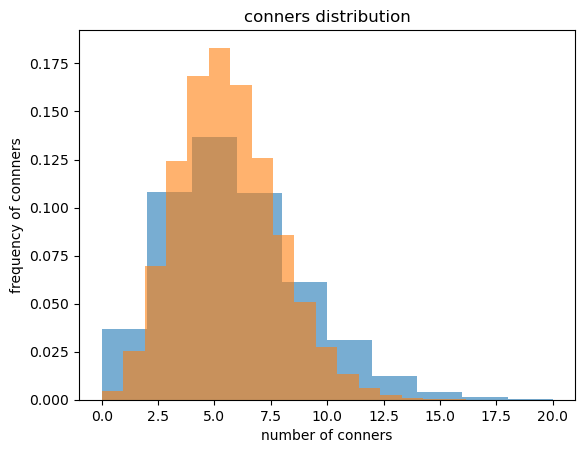

In [37]:
plt.hist(df['conners'], density=True, alpha=0.6 )
plt.hist(x, 20, density=True, alpha=0.6)


plt.xlabel('number of conners')
plt.ylabel('frequency of connners')
plt.title('conners distribution')
plt.show()
plt.show()

In [38]:
poisson_shots = smf.glm(
    formula=" Shots ~ home + team + opponent",
    data=df,
    family=sm.families.Poisson() 
).fit()

In [39]:
poisson_conners = smf.glm(
    formula=" conners ~ home + team + opponent",
    data=df,
    family=sm.families.Poisson() 
).fit()

In [40]:
poisson_yellow = smf.glm(
    formula=" Yellow ~ home + team + opponent",
    data=df,
    family=sm.families.Poisson() 
).fit()

In [41]:
poisson_target = smf.glm(
    formula=" target ~ home + team + opponent",
    data=df,
    family=sm.families.Poisson() 
).fit()

In [42]:
poisson_fouls = smf.glm(
    formula=" Fouls ~ home + team + opponent",
    data=df,
    family=sm.families.Poisson() 
).fit()

In [43]:
poisson_red = smf.glm(
    formula=" Red ~ home + team + opponent",
    data=df,
    family=sm.families.Poisson() 
).fit()

In [44]:
def game(home_team, away_team):
    home_t = pd.DataFrame(data={"team": home_team,
                                "opponent": away_team,
                                "home": 1
                                }, index=[1])
    
    away_t = pd.DataFrame(data={"team": away_team,
                                "opponent": home_team,
                                "home": 0
                                }, index=[1])
    
    return home_t, away_t


In [45]:
def conners(home_t, away_t, model):
            home_con = model.predict(home_t)
            away_con = model.predict(away_t)
            return home_con, away_con

In [46]:
def shots(home_t, away_t, model):
            home_shots = model.predict(home_t)
            away_shots = model.predict(away_t)
            return home_shots, away_shots


In [47]:
def target(home_t, away_t, model):
            home_tar = model.predict(home_t)
            away_tar = model.predict(away_t)
            return home_tar, away_tar

In [48]:
def fouls(home_t, away_t, model):
            home_f = model.predict(home_t)
            away_f = model.predict(away_t)
            return home_f, away_f

In [49]:
def yellow(home_t, away_t, model):
            home_yel = model.predict(home_t)
            away_yel = model.predict(away_t)
            return home_yel, away_yel

In [50]:
def red(home_t, away_t, model):
            home_red = model.predict(home_t)
            away_red = model.predict(away_t)
            return home_red, away_red

In [51]:
df_goals = df.drop(columns=['goals','team', 'opponent'])
df_goals_target = df['goals']
df_goals.head()

,Shots,target,Fouls,conners,Yellow,Red,home
0,19,11,10,18,1,0,1
1,8,6,19,6,0,0,1
2,6,2,12,0,2,0,1
3,9,8,17,4,1,0,1
4,21,16,20,6,2,0,1


In [52]:
df_goals.shape

(12314, 7)

In [53]:
df_goals_target.shape

(12314,)

In [54]:
df_goals = np.array(df_goals)
df_goals_target = np.array(df_goals_target)

In [55]:
df_goals_target = df_goals_target.reshape(-1,1)
df_goals_target.shape

(12314, 1)

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(df_goals)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(df_goals_target)


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
x_train.shape

(9851, 7)

In [59]:
y_test.shape

(2463, 1)

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
ANN_model = keras.Sequential()
ANN_model.add (Dense (25, input_dim = 7, kernel_initializer='normal',activation='relu'))
ANN_model.add (Dense (50, activation = 'relu'))
ANN_model.add (Dropout (0.5))
ANN_model.add (Dense (100, activation ='relu'))
ANN_model.add (Dropout (0.5))
ANN_model.add (Dense (100, activation = 'relu'))
ANN_model.add (Dropout (0.5))
ANN_model.add (Dense (50, activation = 'relu'))
ANN_model.add (Dropout (0.5))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mse', optimizer='adam')
ANN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                200       
                                                                 
 dense_1 (Dense)             (None, 50)                1300      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

In [61]:
history = ANN_model.fit(x_train, y_train, epochs=100, 
          validation_data=(x_test,y_test))

Epoch 1/100
308/308 [==============================] - 4s 5ms/step - loss: 0.0193 - val_loss: 0.0160
Epoch 2/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 3/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0168 - val_loss: 0.0157
Epoch 4/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0168 - val_loss: 0.0162
Epoch 5/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0165 - val_loss: 0.0153
Epoch 6/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0163 - val_loss: 0.0156
Epoch 7/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0160 - val_loss: 0.0147
Epoch 8/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0149
Epoch 9/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0160 - val_loss: 0.0150
Epoch 10/100
308/308 [==============================] - 1s 4ms/step - loss: 0.0158 - val_lo

In [62]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

77/77 [==============================] - 0s 2ms/step - loss: 0.0149
Accuracy : 0.9851452959701419


In [63]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

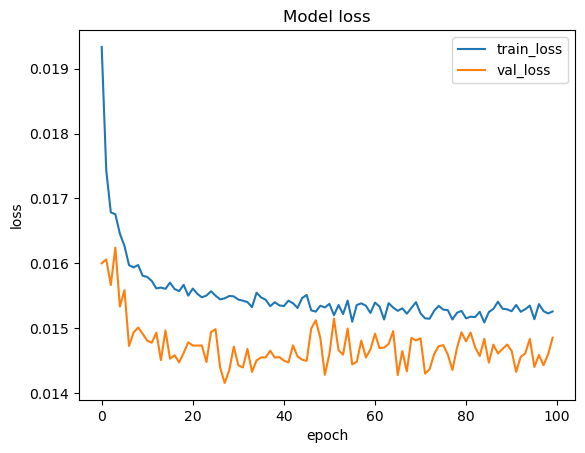

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

77/77 [==============================] - 4s 3ms/step


Text(0, 0.5, 'Model prediction')

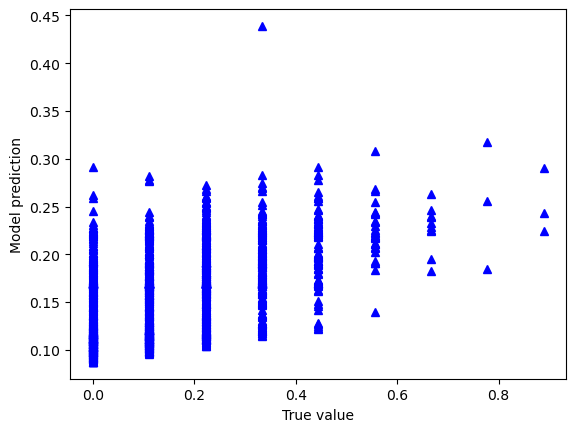

In [65]:
y_predict = ANN_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color='b')
plt.xlabel('True value')
plt.ylabel('Model prediction')

Text(0, 0.5, 'True Values')

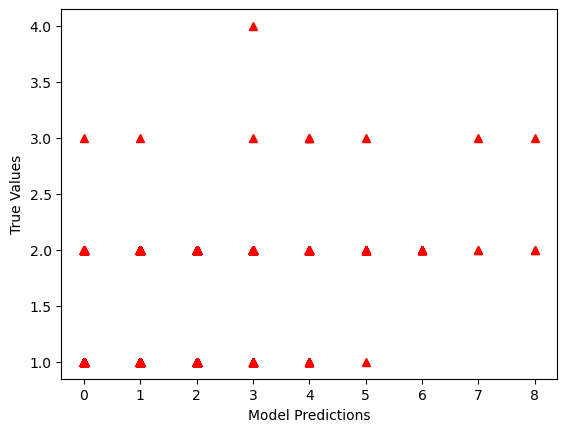

In [66]:
y_predict_orig = scaler_y.inverse_transform(y_predict).round()
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 1.133 
MSE = 1.2833942346731628 
MAE = 0.8327243199350386 
R2 = 0.16685058526135743 
Adjusted R2 = 0.16447500648206193


In [68]:
sample = pd.DataFrame(y_predict_orig.round(),columns=['Predict'])
sample['Actual']=y_test_orig
sample.tail(10)

,Predict,Actual
2453,2.0,1.0
2454,1.0,0.0
2455,2.0,4.0
2456,2.0,2.0
2457,1.0,2.0
2458,1.0,2.0
2459,2.0,4.0
2460,1.0,0.0
2461,1.0,1.0
2462,1.0,2.0


In [69]:
def match_score(team1, team2):
    home_t, away_t = game(team1, team2)
    avg_con = list(conners(home_t, away_t, poisson_conners))
    avg_yel = list(yellow(home_t, away_t, poisson_yellow))
    avg_red = list(red(home_t, away_t, poisson_red))
    avg_tar = list(target(home_t, away_t, poisson_target))
    avg_shots = list(shots(home_t, away_t, poisson_shots))
    avg_foul = list(conners(home_t, away_t, poisson_fouls))

    game_stats = {'shots':avg_shots[0],'target':avg_tar[0],
                  'foul':avg_foul[0],'conners': avg_con[0], 'yellow':avg_yel[0], 
             'red': avg_red[0],'home':1}

    game_stats_1 = {'shots':avg_shots[1],'target':avg_tar[1],
                  'foul':avg_foul[1],'conners': avg_con[1], 'yellow':avg_yel[1], 
             'red': avg_red[1],'home':0}
    
    df_11 = pd.DataFrame.from_dict(game_stats, orient='columns')
    df_12 = pd.DataFrame.from_dict(game_stats_1, orient='columns')
    
    match_df = pd.concat([df_11, df_12])
    match_df.index = [['home', 'away']]
    
    match_df_new = np.array(match_df)
    scaler_pred = MinMaxScaler()
    pred = scaler_pred.fit_transform(match_df_new)
    match_pred = ANN_model.predict(pred)
    predict_orig = scaler_y.inverse_transform(match_pred)
    
    results = pd.DataFrame(predict_orig,columns=['goals'])
    results.index =[['Home', 'Away']]
    results['goals'] =results['goals'].apply(np.floor)
    
    
    
    
    
    return results

In [70]:
match_score('Newcastle', 'Chelsea')

1/1 [==============================] - 0s 44ms/step


,goals
Home,0.0
Away,1.0


In [71]:
match_score('Aston Villa', 'Man United')

1/1 [==============================] - 0s 21ms/step


,goals
Home,0.0
Away,1.0


In [72]:
match_score('Liverpool', 'Southampton')

1/1 [==============================] - 0s 27ms/step


,goals
Home,2.0
Away,0.0


In [74]:
match_score("Nott'm Forest", 'Crystal Palace')

1/1 [==============================] - 0s 28ms/step


,goals
Home,0.0
Away,2.0


In [75]:
match_score('Wolves', 'Arsenal')

1/1 [==============================] - 0s 24ms/step


,goals
Home,0.0
Away,1.0


In [76]:
match_score('West Ham', 'Leicester')

1/1 [==============================] - 0s 23ms/step


,goals
Home,0.0
Away,1.0


In [77]:
match_score('Brighton', 'Aston Villa')

1/1 [==============================] - 0s 45ms/step


,goals
Home,1.0
Away,0.0


In [78]:
match_score('Bournemouth', 'Everton')

1/1 [==============================] - 0s 24ms/step


,goals
Home,0.0
Away,1.0


In [79]:
match_score('Tottenham','Leeds')

1/1 [==============================] - 0s 42ms/step


,goals
Home,2.0
Away,0.0


In [80]:
match_score("Man City", 'Brentford')

1/1 [==============================] - 0s 22ms/step


,goals
Home,2.0
Away,0.0


In [84]:
match_score('Fulham','Man United')

1/1 [==============================] - 0s 25ms/step


,goals
Home,0.0
Away,1.0
